<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/modeling/prophet/CA_TimeSeriesAnalysis_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CA Prophet

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

## Texas Data

In [3]:
CA_labeledData = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/CA_alldatasets_Jan13.csv',low_memory=False)
CA_labeledData.tail()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
15816,2021-01-01,California,6115,40,Yuba County,78668,1,0.427,4,-36.0,-23.0,18.0,-55.0,-68.0,22.0
15817,2021-01-02,California,6115,0,Yuba County,78668,1,1.502,15,-17.0,-11.0,8.0,-41.0,-19.0,8.0
15818,2021-01-03,California,6115,32,Yuba County,78668,1,0.161,1,-11.0,-7.0,33.0,NaN,-10.0,5.0
15819,2021-01-04,California,6115,36,Yuba County,78668,1,0.074,0,-18.0,-8.0,-2.0,-32.0,-35.0,12.0
15820,2021-01-05,California,6115,102,Yuba County,78668,1,0.574,6,-14.0,-6.0,NaN,-26.0,-30.0,10.0


In [4]:
CA_labeledData = CA_labeledData.dropna()

In [5]:
CA_labeledData['label_y'] = preprocessing.LabelEncoder().fit_transform(CA_labeledData['New cases'])

In [6]:
CA_labeledData['County Name Label'] = preprocessing.LabelEncoder().fit_transform(CA_labeledData['County Name'])

In [7]:
CA_labeledData.rename(columns={'Date': 'ds', 'label_y': 'y'}, inplace=True)

In [8]:
train, test = train_test_split(CA_labeledData, test_size=0.2, shuffle=False)

In [9]:
train.head()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
0,2020-03-01,California,6001,0,Alameda County,1671329,0,3.684,58,6.0,9.0,15.0,1.0,4.0,0.0,16,0
1,2020-03-02,California,6001,0,Alameda County,1671329,0,6.182,98,4.0,7.0,7.0,-1.0,3.0,0.0,16,0
2,2020-03-03,California,6001,1,Alameda County,1671329,0,6.271,100,5.0,12.0,41.0,0.0,1.0,-1.0,17,0
3,2020-03-04,California,6001,0,Alameda County,1671329,0,6.209,99,1.0,6.0,23.0,-3.0,1.0,0.0,16,0
4,2020-03-05,California,6001,0,Alameda County,1671329,0,6.654,106,1.0,6.0,12.0,-5.0,-1.0,1.0,16,0


In [10]:
test.tail()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
15810,2020-12-26,California,6115,0,Yuba County,78668,1,0.732,7,-23.0,-17.0,11.0,-38.0,-22.0,9.0,16,43
15814,2020-12-30,California,6115,21,Yuba County,78668,1,1.431,15,-15.0,-9.0,23.0,-42.0,-38.0,12.0,37,43
15816,2021-01-01,California,6115,40,Yuba County,78668,1,0.427,4,-36.0,-23.0,18.0,-55.0,-68.0,22.0,56,43
15817,2021-01-02,California,6115,0,Yuba County,78668,1,1.502,15,-17.0,-11.0,8.0,-41.0,-19.0,8.0,16,43
15819,2021-01-04,California,6115,36,Yuba County,78668,1,0.074,0,-18.0,-8.0,-2.0,-32.0,-35.0,12.0,52,43


## Los Angeles County

In [11]:
CA_labeledData_LA = CA_labeledData[CA_labeledData['County Name'] == 'Los Angeles County']
CA_labeledData_LA = CA_labeledData_LA.reset_index(drop=True)
CA_labeledData_LA.tail()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
295,2021-01-01,California,6037,19980,Los Angeles County,10039107,1,0.057,0,-57.0,-40.0,-24.0,-69.0,-80.0,31.0,1165,11
296,2021-01-02,California,6037,15628,Los Angeles County,10039107,1,0.376,5,-42.0,-20.0,-36.0,-48.0,-35.0,14.0,1163,11
297,2021-01-03,California,6037,12429,Los Angeles County,10039107,1,0.075,1,-40.0,-22.0,-31.0,-46.0,-27.0,11.0,1152,11
298,2021-01-04,California,6037,8859,Los Angeles County,10039107,1,0.127,1,-34.0,-17.0,-32.0,-48.0,-45.0,16.0,1146,11
299,2021-01-05,California,6037,13113,Los Angeles County,10039107,1,0.130,1,-36.0,-16.0,-32.0,-47.0,-46.0,18.0,1156,11


In [12]:
CA_labeledData_LA.head()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
0,2020-03-01,California,6037,0,Los Angeles County,10039107,0,3.996,60,4.0,3.0,-5.0,-3.0,1.0,0.0,16,11
1,2020-03-02,California,6037,0,Los Angeles County,10039107,0,6.502,98,5.0,5.0,8.0,1.0,4.0,-1.0,16,11
2,2020-03-03,California,6037,0,Los Angeles County,10039107,0,6.591,99,8.0,7.0,32.0,2.0,3.0,-1.0,16,11
3,2020-03-04,California,6037,6,Los Angeles County,10039107,0,6.595,100,4.0,6.0,9.0,-1.0,2.0,0.0,22,11
4,2020-03-05,California,6037,4,Los Angeles County,10039107,0,7.008,106,4.0,7.0,9.0,0.0,2.0,0.0,20,11


In [13]:
train_LA, test_LA = train_test_split(CA_labeledData_LA, test_size=0.2, shuffle=False)

In [14]:
m = Prophet()

In [15]:
#m.add_regressor('County Name Label')
m.add_regressor('population')
m.add_regressor('mask_rule_active')
#m.add_regressor('m50')
m.add_regressor('m50_index')
m.add_regressor('retail_and_recreation_percent_change_from_baseline')
m.add_regressor('grocery_and_pharmacy_percent_change_from_baseline')
m.add_regressor('parks_percent_change_from_baseline')
m.add_regressor('transit_stations_percent_change_from_baseline')
m.add_regressor('workplaces_percent_change_from_baseline')
m.add_regressor('residential_percent_change_from_baseline')

In [16]:
m.fit(train_LA)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
295,2020-12-24
296,2020-12-25
297,2020-12-26
298,2020-12-27
299,2020-12-28


In [18]:
future.shape

(300, 1)

In [19]:
train_LA.shape

(240, 17)

In [20]:
test_LA.shape

(60, 17)

In [21]:
CA_labeledData_LA.shape

(300, 17)

In [22]:
#future['County Name Label'] = CA_labeledData_LA['County Name Label']
future['population'] = CA_labeledData_LA['population']
future['mask_rule_active'] = CA_labeledData_LA['mask_rule_active']
#future['m50'] = CA_labeledData_LA['m50']
future['m50_index'] = CA_labeledData_LA['m50_index']
future['retail_and_recreation_percent_change_from_baseline'] = CA_labeledData_LA['retail_and_recreation_percent_change_from_baseline']
future['grocery_and_pharmacy_percent_change_from_baseline'] = CA_labeledData_LA['grocery_and_pharmacy_percent_change_from_baseline']
future['parks_percent_change_from_baseline'] = CA_labeledData_LA['parks_percent_change_from_baseline']
future['transit_stations_percent_change_from_baseline'] = CA_labeledData_LA['transit_stations_percent_change_from_baseline']
future['workplaces_percent_change_from_baseline'] = CA_labeledData_LA['workplaces_percent_change_from_baseline']
future['residential_percent_change_from_baseline'] = CA_labeledData_LA['residential_percent_change_from_baseline']

In [23]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,grocery_and_pharmacy_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline_lower,grocery_and_pharmacy_percent_change_from_baseline_upper,m50_index,m50_index_lower,m50_index_upper,mask_rule_active,mask_rule_active_lower,mask_rule_active_upper,parks_percent_change_from_baseline,parks_percent_change_from_baseline_lower,parks_percent_change_from_baseline_upper,population,population_lower,population_upper,residential_percent_change_from_baseline,residential_percent_change_from_baseline_lower,residential_percent_change_from_baseline_upper,retail_and_recreation_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline_lower,retail_and_recreation_percent_change_from_baseline_upper,transit_stations_percent_change_from_baseline,transit_stations_percent_change_from_baseline_lower,transit_stations_percent_change_from_baseline_upper,weekly,weekly_lower,weekly_upper,workplaces_percent_change_from_baseline,workplaces_percent_change_from_baseline_lower,workplaces_percent_change_from_baseline_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
295,2020-12-24,1087.733180,1462.349839,2629.742619,1087.632038,1087.836765,961.731892,961.731892,961.731892,930.753245,930.753245,930.753245,-35.569817,-35.569817,-35.569817,49.057777,49.057777,49.057777,-195.33418,-195.33418,-195.33418,-122.990251,-122.990251,-122.990251,599.142436,599.142436,599.142436,641.944289,641.944289,641.944289,401.929337,401.929337,401.929337,96.567872,96.567872,96.567872,30.978647,30.978647,30.978647,-503.994219,-503.994219,-503.994219,0.0,0.0,0.0,2049.465072
296,2020-12-25,1091.483541,790.489723,1947.266232,1091.379181,1091.590060,270.526899,270.526899,270.526899,238.908130,238.908130,238.908130,-10.268228,-10.268228,-10.268228,40.338978,40.338978,40.338978,-195.33418,-195.33418,-195.33418,-359.446808,-359.446808,-359.446808,599.142436,599.142436,599.142436,-6.035102,-6.035102,-6.035102,134.915937,134.915937,134.915937,27.197565,27.197565,27.197565,31.618770,31.618770,31.618770,8.397531,8.397531,8.397531,0.0,0.0,0.0,1362.010440
297,2020-12-26,1095.233901,880.573483,1994.692361,1095.127369,1095.343228,348.646920,348.646920,348.646920,276.410656,276.410656,276.410656,-12.798387,-12.798387,-12.798387,47.314017,47.314017,47.314017,-195.33418,-195.33418,-195.33418,-260.923243,-260.923243,-260.923243,599.142436,599.142436,599.142436,-120.384407,-120.384407,-120.384407,99.314151,99.314151,99.314151,20.590869,20.590869,20.590869,72.236265,72.236265,72.236265,99.489398,99.489398,99.489398,0.0,0.0,0.0,1443.880822
298,2020-12-27,1098.984262,657.967968,1742.492196,1098.875206,1099.096728,118.113583,118.113583,118.113583,148.458149,148.458149,148.458149,-6.472990,-6.472990,-6.472990,47.314017,47.314017,47.314017,-195.33418,-195.33418,-195.33418,-280.627956,-280.627956,-280.627956,599.142436,599.142436,599.142436,70.197767,70.197767,70.197767,-7.491209,-7.491209,-7.491209,27.197565,27.197565,27.197565,-30.344567,-30.344567,-30.344567,-105.467302,-105.467302,-105.467302,0.0,0.0,0.0,1217.097845
299,2020-12-28,1102.734623,734.853122,1926.765150,1102.621729,1102.849836,171.471844,171.471844,171.471844,246.868054,246.868054,246.868054,-5.207910,-5.207910,-5.207910,47.314017,47.314017,47.314017,-195.33418,-195.33418,-195.33418,-280.627956,-280.627956,-280.627956,599.142436,599.142436,599.142436,146.430637,146.430637,146.430637,28.110577,28.110577,28.110577,23.894217,23.894217,23.894217,-75.396210,-75.396210,-75.396210,-116.853785,-116.853785,-116.853785,0.0,0.0,0.0,1274.206466


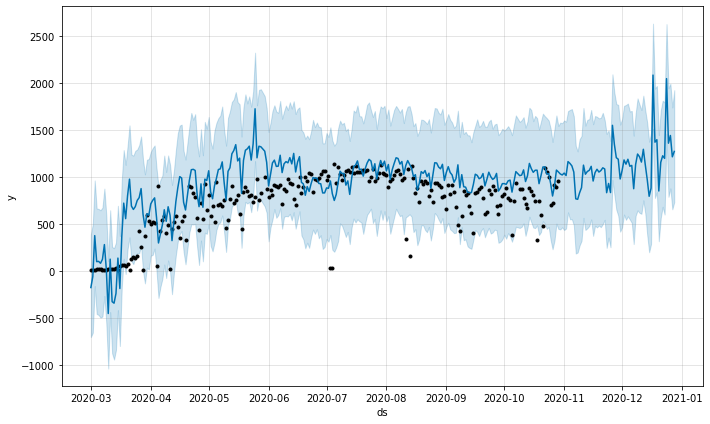

In [24]:
fig1 = m.plot(forecast)

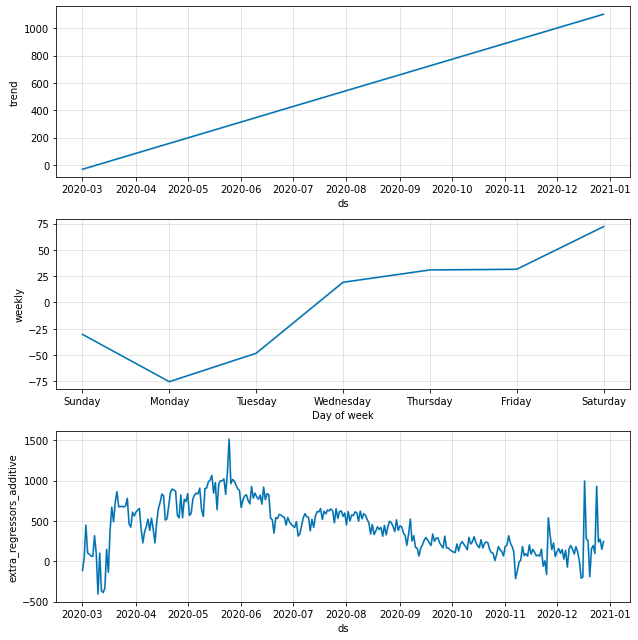

In [25]:
fig2 = m.plot_components(forecast)

In [26]:
plot_components_plotly(m, forecast)

In [27]:
plot_plotly(m, forecast)

In [28]:
cross_validation_results = cross_validation(m, period='15 days', horizon='59 days')
print(cross_validation_results)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-31 00:00:00 and 2020-08-31 00:00:00



           ds         yhat  yhat_lower   yhat_upper     y     cutoff
0  2020-09-01  1235.853432  473.047229  2019.860869   666 2020-08-31
1  2020-09-02  1270.621828  515.397968  2047.954069   916 2020-08-31
2  2020-09-03  1208.912419  425.367565  1955.708725   818 2020-08-31
3  2020-09-04  1215.333757  446.065182  1956.890095   915 2020-08-31
4  2020-09-05  1176.397352  383.992361  1940.261961   846 2020-08-31
5  2020-09-06  1228.393591  463.302623  2044.212399   686 2020-08-31
6  2020-09-07  1400.217443  634.936164  2193.103119   487 2020-08-31
7  2020-09-08  1245.108681  549.869341  2063.414792   427 2020-08-31
8  2020-09-09  1287.811524  467.506697  2088.188675   585 2020-08-31
9  2020-09-10  1208.332906  468.417174  1978.073988   856 2020-08-31
10 2020-09-11  1204.703529  441.181583  1933.881656   810 2020-08-31
11 2020-09-12  1121.546818  359.668517  1900.733865   836 2020-08-31
12 2020-09-13  1176.326860  382.380117  1953.272487   697 2020-08-31
13 2020-09-14  1172.806539  379.9

In [29]:
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

   horizon            mse        rmse         mae      mape     mdape  coverage
0   5 days  160532.974080  400.665664  389.223758  0.487888  0.390541       1.0
1   6 days  154424.548685  392.968890  383.731789  0.474893  0.390541       1.0
2   7 days  296066.440223  544.119877  495.450912  0.772503  0.477888       0.8
3   8 days  399364.299138  631.952767  580.890165  1.060114  0.790661       0.6
4   9 days  480113.033747  692.901893  661.385718  1.234745  1.201387       0.6
5  10 days  483108.247053  695.059887  665.772829  1.238958  1.201387       0.6
6  11 days  455428.260700  674.854251  636.234817  1.178283  1.201387       0.6
7  12 days  304942.437942  552.215934  510.700692  0.871558  0.487288       0.8
8  13 days  217032.922888  465.867924  442.944327  0.625909  0.487288       1.0
9  14 days  180028.296830  424.297416  413.543330  0.565795  0.487288       1.0
10 15 days  297735.106866  545.651085  511.916617  0.901395  0.687700       0.8
11 16 days  308916.223530  555.802324  5